In [86]:
import numpy as np
import pandas as pd

In [87]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [88]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
67,spam,Urgent UR awarded a complimentary trip to Euro...,NaN,NaN,NaN
1393,ham,Oh ok..,NaN,NaN,NaN
2257,ham,Here got lots of hair dresser fr china.,NaN,NaN,NaN
43,ham,WHO ARE YOU SEEING?,NaN,NaN,NaN
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit...",NaN,NaN,NaN


In [89]:
df.shape

(5572, 5)

In [90]:
#1. Data cleaning
#2. EDA
#3. Text preprocessing 
#4. Model building
#5. Evaluation
#6. Improvement 
#7. Website
#8. Deployment

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True )

In [9]:
df.sample(5)

,v1,v2
2892,ham,K I'll be sure to get up before noon and see w...
2948,ham,at bruce b downs &amp; fletcher now
1014,ham,"Ya, told..she was asking wats matter?"
2208,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...
4783,ham,Indeed and by the way it was either or - not b...


In [10]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(6)

,target,text
5077,spam,Do you want a New Nokia 3510i colour phone Del...
3989,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...
4553,ham,Try to do something dear. You read something f...
653,ham,Fine i miss you very much.
4884,ham,Poor girl can't go one day lmao


In [11]:
#convert text to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
# 0 - ham 1 - spam

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum() 
# when sum is added it returns t/f value in numbers

target    0
text      0
dtype: int64

In [15]:
# check for dupe values
df.duplicated().sum()

403

In [16]:
#first occurence of that row
df= df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [23]:
print(df.columns)

Index(['target', 'text'], dtype='object')


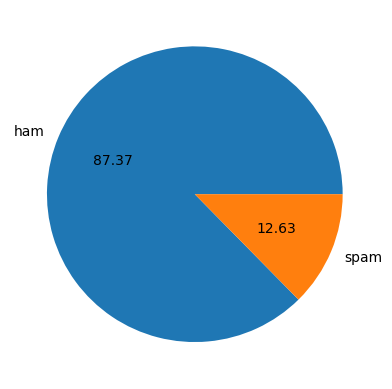

In [24]:
#represnting visually using pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
#autopct="%0.2f" to give in % with two values after decimal
plt.show()

In [25]:
# Data is imbalanced 

In [26]:
#NLTK (Natural Language Toolkit) is a leading Python library specifically designed for working with textual data, 
#also known as natural language.  It provides a wide range of tools and resources for various natural language processing (NLP)
#tasks.
import nltk

In [37]:
#installs the librarry 
!pip install nltk

In [38]:
#installing some dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
df['num_characters'] = df['text'].apply(len)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
#fetching number of words
#tokenizer breaks a sentence on the basis of each words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
#spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [48]:
#It allows you to find trends in your data that you can't notice just by looking at the data. 
#Python Seaborn library helps you visualize the data and draw conclusions.
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

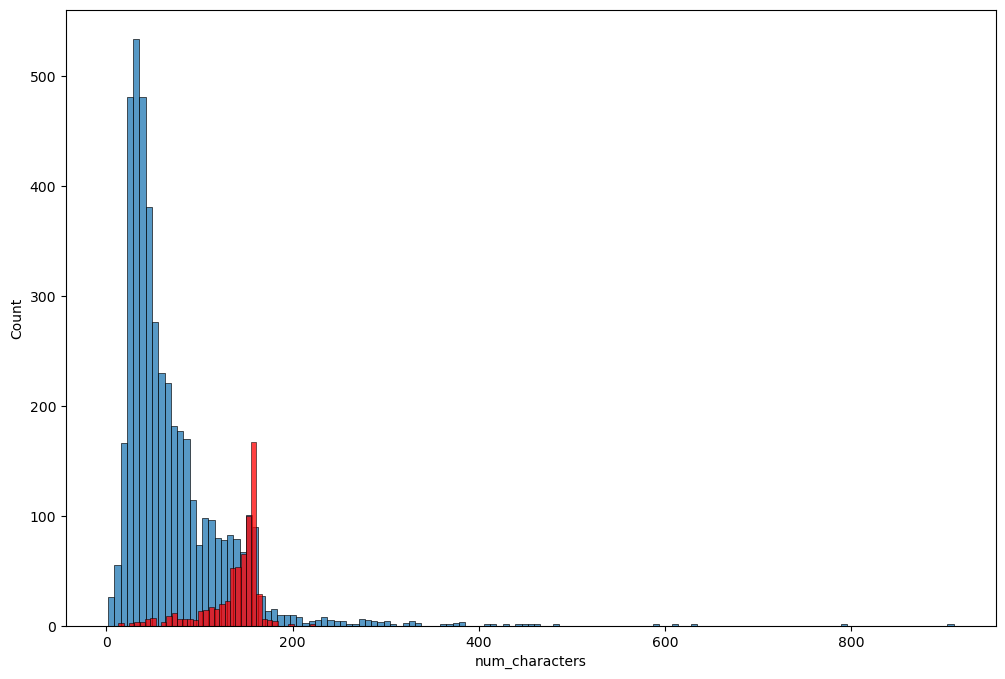

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

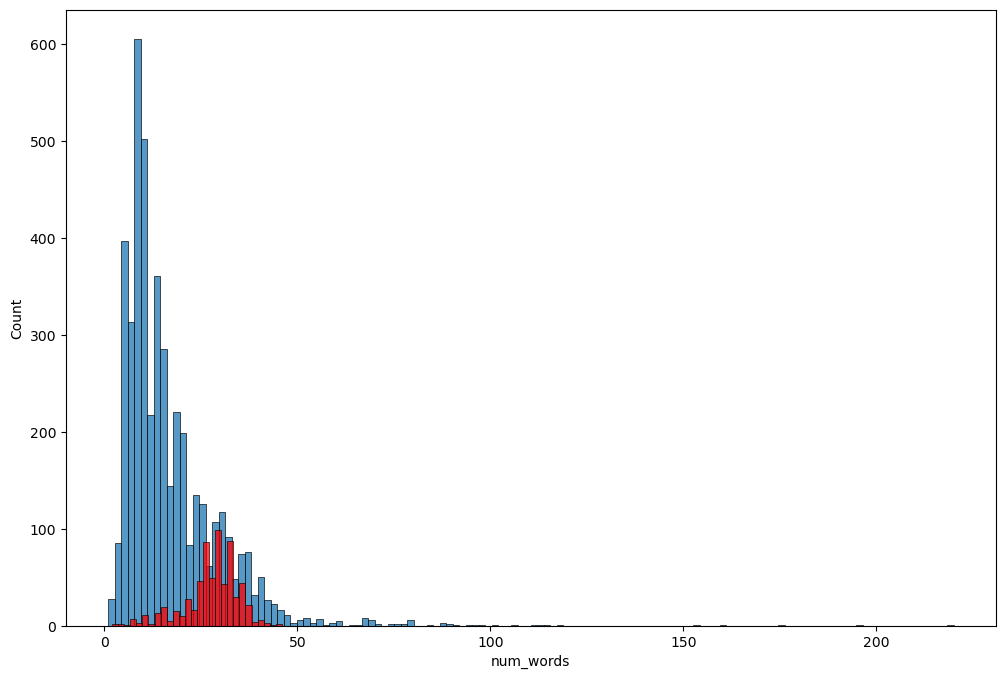

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\heena\Downloads\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


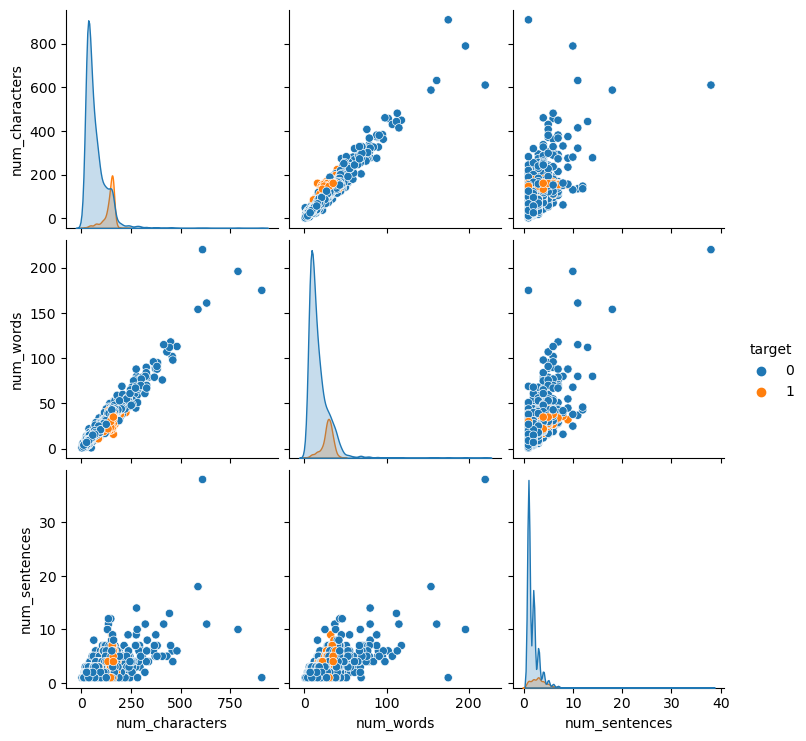

In [51]:
#Seaborn Pairplot is a Python library that allows you to plot pairwise relationships within a data set,
#making it easier to visualize and understand large data sets
#hue=allows for easy coloring of data points based on categorical variables.
sns.pairplot(df,hue='target')

In [52]:
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

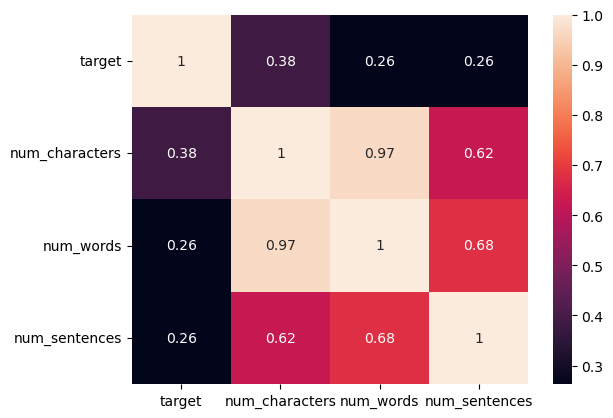

In [53]:
#It calculates the correlation coefficient, 
#a statistical measure that describes the strength and direction of a linear relationship between variables.
sns.heatmap(numeric_df.corr(), annot=True) 

3. Data Preprocessing

* Lower case 
* Tokenization
* Removing special Characters 
* Removing stop words and punctuations
* Stemming(same type of words)

In [54]:
#fn that wil perform all these tasks in a single line
def transform_text(text):
    #transforming to lowercase
    text = text.lower()
    #returning as an array
    text = nltk.word_tokenize(text)
    
    #removing special chars from the array
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    #Creates a new list with the same elements        
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [55]:
#stop words(a list of common words like "the", "a", "is", etc., used for text processing)
#used for sentence formation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
#transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [59]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('writing')

'write'

In [61]:
df['transformed_text']=df['text'].apply(transform_text)

In [85]:
x = cv.fit_transform(df['transformed_text']).toarray()

KeyError: 'transformed_text'

In [63]:
#A word cloud is a visually prominent presentation of “keywords” that appear frequently in text data.
from wordcloud import WordCloud
# Creating a WordCloud object
wc = WordCloud(width=500,height=500,min_font_size = 10,background_color='white')

In [64]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

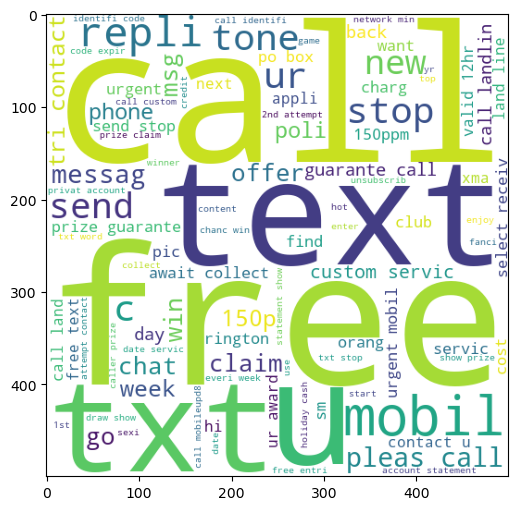

In [65]:
# This uses the imshow() function from the matplotlib.pyplot module (which is usually imported as plt) to display an image
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [66]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

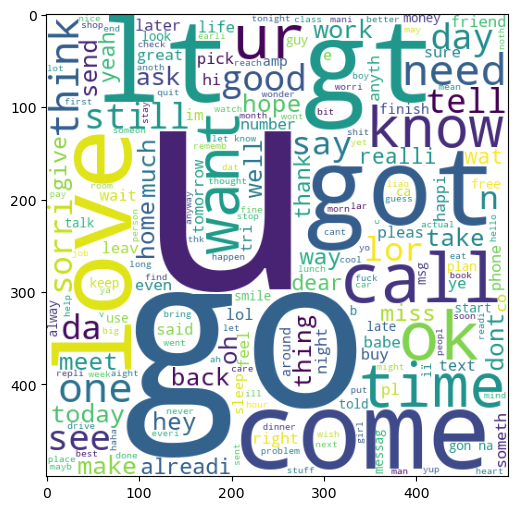

In [67]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [68]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
#a corpus refers to a large and structured set of text data.
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [67]:
len(spam_corpus)

9939

In [62]:
df.head(8)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...


In [91]:
#The Counter class is a specialized dictionary subclass that is very useful for counting the frequency of items
# in a list or other iterable.
from collections import Counter
#DataFrames are two-dimensional labeled data structures with columns of potentially different types
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])



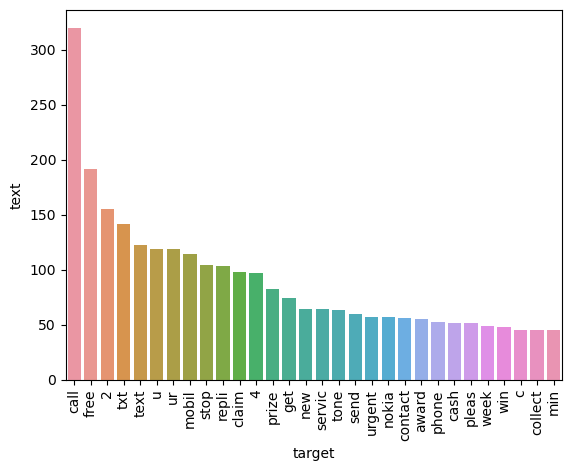

In [92]:
common_counts = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(common_counts, columns=['target', 'text'])
sns.barplot(x='target', y='text', data=df)
plt.xticks(rotation='vertical')  #x axis value
plt.show()

In [93]:
ham_corpus =[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

KeyError: 'transformed_text'

In [94]:
print(df.columns)

Index(['target', 'text'], dtype='object')


In [95]:
len(ham_corpus)

0

In [96]:
from collections import Counter
common_counts = Counter(ham_corpus).most_common(30)
df = pd.DataFrame(common_counts, columns=['target', 'text'])
sns.barplot(x='target', y='text', data=df)
plt.xticks(rotation='vertical')  #x axis value
plt.show()

ValueError: min() arg is an empty sequence

In [97]:
df.head()

,target,text


4. MODEL BUILDING (Using Naive Bayes Model)

In [98]:
#text vectorisating using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fits_transform(df['target']).toarray()

In [84]:
x.shape

(1, 1)